## Bagging Classifier (from Decision Tree)

Here we create a BaggingClassifier with a DecisionTreeClassifier with 
- max_depth = 6
- n_estimators = 30

## Table of Content

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

pd.set_option('use_inf_as_na', True)
from collections import Counter

In [3]:
raw_data = pd.read_pickle(r'..\HW1_Decision Tree\dataset.pkl')

In [4]:
data = raw_data[raw_data['market_cap'] > 1000.0]

In [5]:
data.fillna(0.0, inplace=True)

c:\users\gulishana\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### Insert a column in the data set where the entries are： (1) 1 if the stock outperforms SPY in the earnings period; (2) -1 if it underperforms or has the same return

In [6]:
def f(x):
    if x > 0:
        return 1
    else:
        return -1

In [7]:
data['rel_performance'] = data['pred_rel_return'].apply(f)

c:\users\gulishana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data.reset_index(inplace=True,)
data.set_index('date',inplace=True)

In [9]:
data.head()

,ticker,actq,apq,atq,ceqq,cheq,cogsq,csh12q,cshfdq,cshiq,...,sector_code_817.0,sector_code_822.0,sector_code_823.0,sector_code_825.0,sector_code_830.0,sector_code_835.0,sector_code_840.0,sector_code_845.0,sector_code_850.0,rel_performance
date,,,,,,,,,,,,,,,,,,,,,
2000-02-09,CSCO,7722.000,482.000,21391.000,16523.000,3968.000,1422.000,3374.1250,3648.000,3445.000,...,0,0,0,0,0,0,0,0,0,-1
2000-02-09,ROP,172.725,19.662,474.649,239.432,3.198,47.634,30.2688,31.217,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-10,CMOS,240.767,27.044,376.536,209.411,68.625,43.023,21.4360,23.753,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-11,DELL,7681.000,3538.000,11471.000,5308.000,4132.000,5452.000,2536.0000,2731.000,2575.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-15,VAL,507.082,139.497,1094.080,402.382,27.605,221.366,43.1858,43.687,53.321,...,0,0,0,0,0,0,0,0,0,1


### Use the period 2007-04-30 to 2010-04-30 to train the model

In [10]:
df_1 = data.loc['2007-04-30':'2010-04-30']

### Use the period 2010-07-31 to 2010-10-31 to find the optimal features

In [11]:
df_valid = data.loc['2010-07-31':'2010-10-31']

In [12]:
train_1 = df_1.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)


valid = df_valid.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [13]:
train_1_stock_returns = df_1['next_period_return']
valid_stock_returns = df_valid['next_period_return']

In [14]:
y_1 = df_1['rel_performance']
y_valid = df_valid['rel_performance']

In [15]:
y_1 = y_1.values
y_valid = y_valid.values

### Create a DecisionTreeClassifier with `max_depth = 6`

In [16]:
t_clf = DecisionTreeClassifier(min_samples_leaf=2400, max_depth=6)

### Create a BaggingClassifier with # `n_estimators = 30` DecisionTreeClassifiers

In [17]:
bg_clf = BaggingClassifier(t_clf, n_estimators=30, oob_score=True, random_state=123, n_jobs=-1)

In [18]:
bg_clf.fit(train_1,y_1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2400, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=-1, oob_score=True,
         random_state=123, verbose=0, warm_start=False)

In [19]:
bg_clf.score(train_1,y_1)

0.5591953665068194

In [20]:
bg_clf.score(valid,y_valid)

0.5579399141630901

In [21]:
pred_valid = bg_clf.predict(valid)

In [22]:
Counter(pred_valid)

Counter({1: 1260, -1: 138})

In [23]:
Counter(y_valid)

Counter({-1: 604, 1: 794})

In [24]:
bg_clf.oob_score_

0.5567042411409354

In [25]:
confusion_matrix(y_valid,pred_valid)

array([[ 62, 542],
       [ 76, 718]], dtype=int64)

In [26]:
def baggingtree_feat_importance(m, df):
    feature_importances = []
    for est in m.estimators_:
        fi = est.feature_importances_
        feature_importances.append(fi)
    feature_importances = np.array(feature_importances)
    print(feature_importances.shape)
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp':np.mean(feature_importances,axis=0)}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [27]:
fi = baggingtree_feat_importance(bg_clf,train_1)

(30, 725)


In [28]:
features = fi[(fi['feat_imp'] > 0.003)]
#features

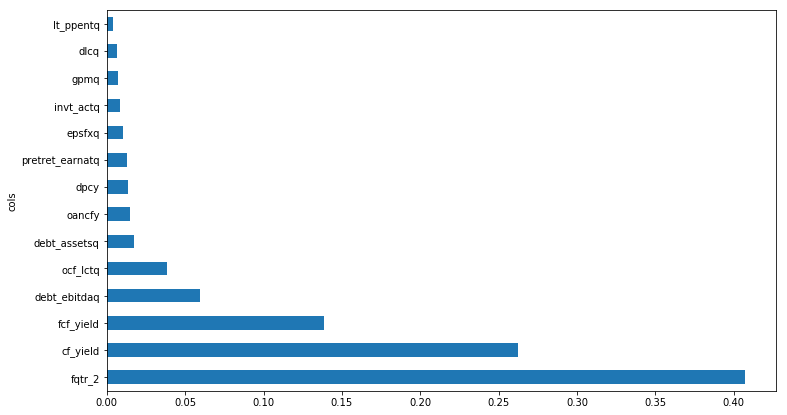

In [29]:
plot_fi(features);

In [30]:
len(features['cols'].values)

14

In [31]:
train_1 = train_1[features['cols'].values]
valid = valid[features['cols'].values]

In [32]:
bg_clf.fit(train_1,y_1)
bg_clf.score(train_1,y_1)

0.5591953665068194

In [33]:
pred_valid = bg_clf.predict(valid)
bg_clf.score(valid,y_valid)

0.5579399141630901

In [34]:
bg_clf.oob_score_

0.5567042411409354

In [35]:
(pred_valid * valid_stock_returns).sum()

145.30139000000003

In [36]:
def profit_importance(t,df,rets):
#     np.random.seed(123)
    profit = []
    for col in df.columns:
        prof = []
        for _ in range(10):
            X = df.copy()
            X[col] = np.random.permutation(df[col].values)
            prediction = t.predict(X)
            prof.append((prediction * rets).sum())
        profit.append(np.mean(prof))
    return profit

In [37]:
def baggingtree_profit_importance(m, df,rets):
    return pd.DataFrame({'cols':df.columns, 'pi_imp':profit_importance(m,df,rets)}
                       ).sort_values('pi_imp', ascending=True)

In [38]:
pi = baggingtree_profit_importance(bg_clf,valid,df_valid['next_period_return'])
pi

,cols,pi_imp
0,fqtr_2,134.337471
9,epsfxq,143.670901
4,ocf_lctq,144.355247
3,debt_ebitdaq,145.301390
5,debt_assetsq,145.301390
6,oancfy,145.301390
7,dpcy,145.301390
8,pretret_earnatq,145.301390
10,invt_actq,145.301390
11,gpmq,145.301390


In [39]:
profits = []
feat=[]

train = train_1.copy()
validation = valid.copy()

while len(train.columns)>1:

    col_to_drop = pi.iloc[-1]['cols']
    train.drop(col_to_drop,axis=1,inplace=True)
    validation.drop(col_to_drop,axis=1,inplace=True)
        
    bg_clf.fit(train,y_1)
    pi = baggingtree_profit_importance(bg_clf,validation,df_valid['next_period_return'])

    pred_valid = bg_clf.predict(validation)
        
    print((pred_valid * df_valid['next_period_return']).sum())
    profits.append((pred_valid * df_valid['next_period_return']).sum())
    feat.append(train.columns)

138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
138.39509000000004
55.46948600000002


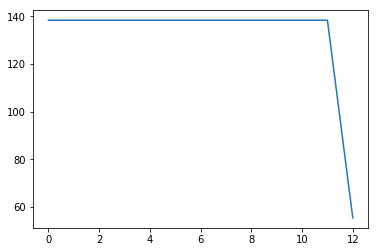

In [40]:
plt.plot(profits);

In [41]:
n = np.argmax(profits)
optim_feats = feat[n]
max_profits = profits[n]

In [42]:
print(max_profits)
print(optim_feats)

138.39509000000004
Index(['fqtr_2', 'cf_yield', 'debt_ebitdaq', 'ocf_lctq', 'debt_assetsq',
       'oancfy', 'dpcy', 'pretret_earnatq', 'epsfxq', 'invt_actq', 'gpmq',
       'dlcq', 'lt_ppentq'],
      dtype='object')


In [43]:
train_1_optim = train_1[optim_feats]
valid_optim = valid[optim_feats]

bg_clf.fit(train_1_optim,y_1)
print("The score of training is", bg_clf.score(train_1_optim,y_1))

pred_valid_tree = bg_clf.predict(valid_optim)
print("The score of validation is", bg_clf.score(valid_optim,y_valid))

(pred_valid_tree * valid_stock_returns).sum()

The score of training is 0.558261194494613
The score of validation is 0.5550786838340487


138.39509000000004

In [44]:
from scipy.cluster import hierarchy as hc
import scipy.stats

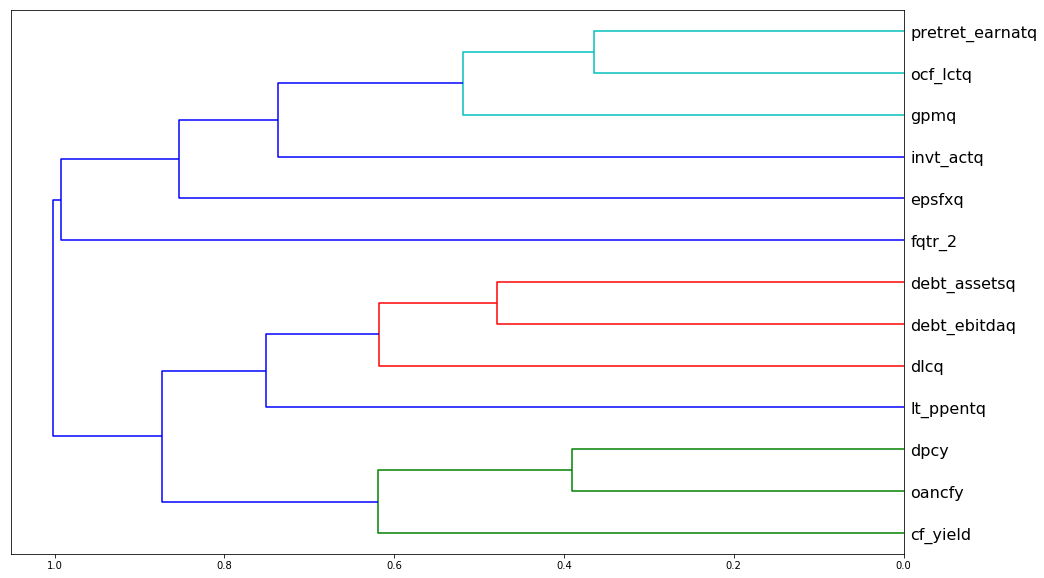

In [45]:
corr = np.round(scipy.stats.spearmanr(train_1_optim).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train_1_optim.columns, orientation='left', leaf_font_size=16)
plt.show()
# x=0: strongly correlated

### Backtest the performance of the model with the optimal features over the period 2010-01-01 to 2018-12-31    
There are #(5*4 + 3 = 23) training frames in total

In [46]:
# backtest
start_dates = [pd.to_datetime('2010-01-01') + pd.DateOffset(months = 3 * i) for i in range(23)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [47]:
training_frames = [data.loc[d:d+pd.DateOffset(months = 36)] for d in start_dates]
test_frames = [data.loc[d + pd.DateOffset(months=3):d+pd.DateOffset(months = 6)] for d in end_dates]

In [48]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [49]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [50]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [51]:
opt_training_data = [t[optim_feats] for t in training_data]
opt_test_data = [v[optim_feats] for v in test_data]

In [52]:
P_L = []
x = [1]
ret = []

for i in range(len(training_labels)):
    bg_clf.fit(opt_training_data[i],training_labels[i])
    pred_i = bg_clf.predict(opt_test_data[i])
    profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
    P_L.append(profit_i)
    num_positions = len(pred_i)
    ret.append((1.0/num_positions) * profit_i)
    x.append(x[i] + (x[i]/num_positions) * profit_i)


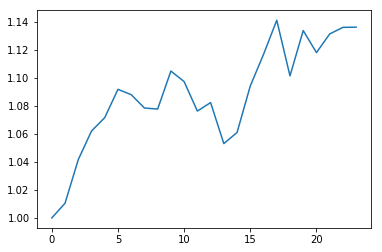

In [53]:
plt.plot(x);

In [54]:
SPY = pd.read_pickle(r'..\HW1_Decision Tree\SPY_cum_ret.pkl')
SPY = SPY.loc['2013-01-01':]
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

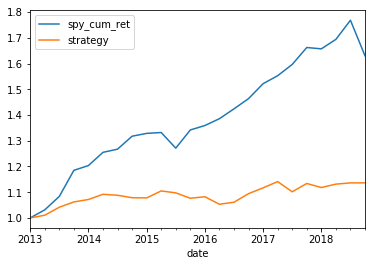

In [55]:
SPY.plot();

In [56]:
SPY = SPY.resample('Y').ffill()

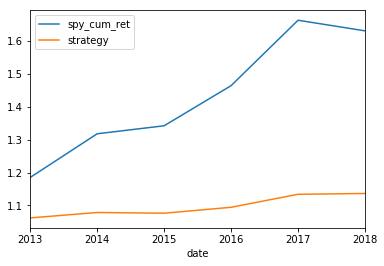

In [57]:
SPY.plot();

In [58]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
strategy_sr = strategy_mean_ret/strategy_std
print('Strategy Sharpe Ratio: ',strategy_sr)

Strategy Sharpe Ratio:  0.9091229578274586


In [59]:
(SPY['spy_cum_ret'] - 1).diff().mean()
(SPY['spy_cum_ret'] - 1).diff().std()
print('SP Sharpe Ratio: ',(SPY['spy_cum_ret'] - 1).diff().mean()/(SPY['spy_cum_ret'] - 1).diff().std())

SP Sharpe Ratio:  0.9675171990497208


In [60]:
x[-1]

1.136297107882124

In [61]:
SPY['spy_cum_ret'][-1]

1.6303419999999993

In [62]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]
beta

0.20251596457548232

In [63]:
residual_ret = strategy_ret - beta * spy_ret
IR = np.mean(residual_ret)/np.std(residual_ret)
IR

-0.46737637437142177

In [64]:
alpha = np.mean(residual_ret)
alpha

-0.0031894271191169514

## Results
- The score of validation is 0.5551
- Sharpe ratio for the strategy is 0.9091
- Sharpe ratio for SPY is 0.9675
- Information ratio for the strategy is -0.4674
- Alpha for the strategy is -0.0032